In [1]:
import common

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import random

random.seed(123)
np.random.seed(123)

In [8]:
data = pd.read_csv(common.data_dir / 'Wave soldering stacked.csv')
data.head()

,A,B,C,D,E,F,G,Label,Data
0,-1,-1,-1,-1,-1,-1,-1,SqrtY1,3.605551
1,-1,-1,-1,-1,-1,-1,-1,SqrtY2,5.477226
2,-1,-1,-1,-1,-1,-1,-1,SqrtY3,5.099020
3,-1,-1,-1,1,1,1,1,SqrtY1,2.000000
4,-1,-1,-1,1,1,1,1,SqrtY2,4.000000


In [5]:
formula_main = 'Data ~ A + B + C + D + E + F + G'
formula_interaction = ('Data ~ A + B + C + G + A:B + A:C + A:G + B:C + B:G + C:G  + ' +
                       'A:B:C + A:B:G + A:C:G + B:C:G + A:B:C:G')
group = ['A', 'B', 'C', 'D', 'E', 'F', 'G']


# Wave soldering data OLS models

In [6]:
results = {
    'ols_main': common.buildModel(data, formula_main),
    'ols_interaction': common.buildModel(data, formula_interaction),
}
results['ols_interaction'].summary().tables[1]


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,5.0520,0.239,21.176,0.000,4.566,5.538
A,0.5404,0.239,2.265,0.030,0.054,1.026
B,-0.5393,0.239,-2.261,0.031,-1.025,-0.053
C,1.4238,0.239,5.968,0.000,0.938,1.910
G,-0.8932,0.239,-3.744,0.001,-1.379,-0.407
A:B,-0.2714,0.239,-1.138,0.264,-0.757,0.215
A:C,0.7890,0.239,3.307,0.002,0.303,1.275
A:G,0.0261,0.239,0.109,0.914,-0.460,0.512
B:C,-0.5103,0.239,-2.139,0.040,-0.996,-0.024
B:G,0.0149,0.239,0.062,0.951,-0.471,0.501


In [13]:
# How often does bootstrap analysis remove whole groups
from collections import Counter
ngroups = len(list(data.groupby(list('ABCDEFG'))))
print(ngroups)
missing = []
for _ in range(1000):
    sampled = data.sample(frac=1, replace=True)
    missing.append(ngroups - len(list(sampled.groupby(list('ABCDEFG')))))
(np.array([Counter(missing).get(n, 0) for n in range(5)]) / len(missing)).round(3)

16


array([0.419, 0.42 , 0.134, 0.025, 0.002])

# Bootstrap analysis

In [14]:
results.update({
    'BA_main': common.bootstrapAnalysis(data, formula_main),
    'BA_interaction': common.bootstrapAnalysis(data, formula_interaction),
    'BBA_main': common.befittingBootstrapAnalysis(data, formula_main, group),
    'BBA_interaction': common.befittingBootstrapAnalysis(data, formula_interaction, group),
    'pBA_main': common.parametricBootstrapAnalysis(data, formula_main),
    'pBA_interaction': common.parametricBootstrapAnalysis(data, formula_interaction),
    'pBBA_main': common.parametricBefittingBootstrapAnalysis(data, formula_main, group),
    'pBBA_interaction': common.parametricBefittingBootstrapAnalysis(data, formula_interaction, group),
    'wBA_main': common.wildBootstrapAnalysis(data, formula_main),
    'wBA_interaction': common.wildBootstrapAnalysis(data, formula_interaction),
})


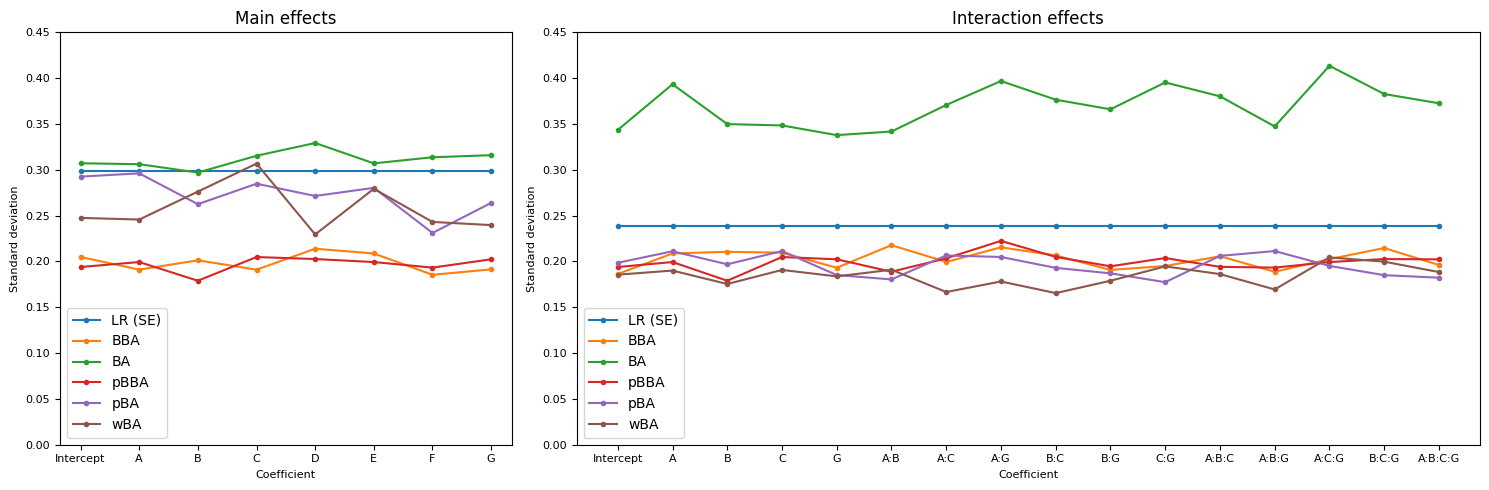

In [15]:
yrange = (0, 0.45)
fig, axes = plt.subplots(ncols=2, figsize=(15, 5), width_ratios=[1, 2])
ax = common.plot_std_coefficients(results['ols_main'], results['BBA_main'], results['BA_main'], 
                                  results['pBBA_main'], results['pBA_main'], results['wBA_main'], ax=axes[0])
ax.set_ylim(yrange)
ax.set_title('Main effects')
ax = common.plot_std_coefficients(results['ols_interaction'], results['BBA_interaction'], results['BA_interaction'], 
                                  results['pBBA_interaction'], results['pBA_interaction'], results['wBA_interaction'], 
                                  ax=axes[1])
ax.set_ylim(yrange)
ax.set_title('Interaction effects')
ax.legend()
plt.tight_layout()
common.saveFigure('wavesoldering-std.pdf')


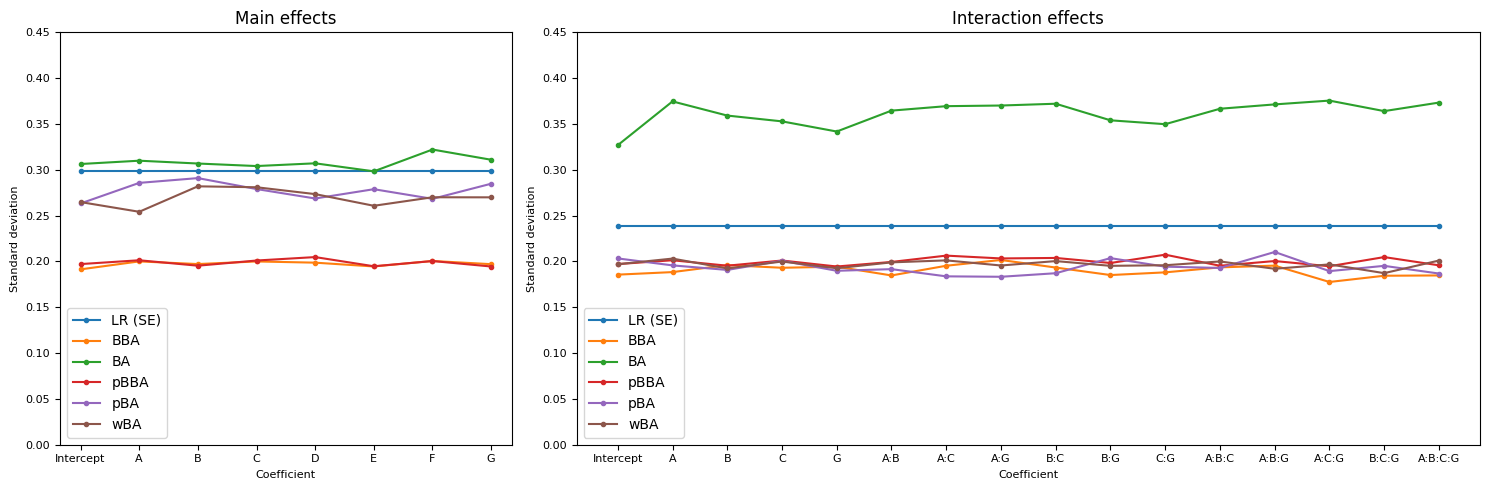

In [16]:
results.update({
    'BA_main': common.bootstrapAnalysis(data, formula_main, nrepeats=500),
    'BA_interaction': common.bootstrapAnalysis(data, formula_interaction, nrepeats=500),
    'BBA_main': common.befittingBootstrapAnalysis(data, formula_main, group, nrepeats=500),
    'BBA_interaction': common.befittingBootstrapAnalysis(data, formula_interaction, group, nrepeats=500),
    'pBA_main': common.parametricBootstrapAnalysis(data, formula_main, nrepeats=500),
    'pBA_interaction': common.parametricBootstrapAnalysis(data, formula_interaction, nrepeats=500),
    'pBBA_main': common.parametricBefittingBootstrapAnalysis(data, formula_main, group, nrepeats=500),
    'pBBA_interaction': common.parametricBefittingBootstrapAnalysis(data, formula_interaction, group, nrepeats=500),
    'wBA_main': common.wildBootstrapAnalysis(data, formula_main, nrepeats=500),
    'wBA_interaction': common.wildBootstrapAnalysis(data, formula_interaction, nrepeats=500),
})

yrange = (0, 0.45)
fig, axes = plt.subplots(ncols=2, figsize=(15, 5), width_ratios=[1, 2])
ax = common.plot_std_coefficients(results['ols_main'], results['BBA_main'], results['BA_main'], 
                                  results['pBBA_main'], results['pBA_main'], results['wBA_main'], ax=axes[0])
ax.set_ylim(yrange)
ax.set_title('Main effects')
ax = common.plot_std_coefficients(results['ols_interaction'], results['BBA_interaction'], results['BA_interaction'], 
                                  results['pBBA_interaction'], results['pBA_interaction'], results['wBA_interaction'], 
                                  ax=axes[1])
ax.set_ylim(yrange)
ax.set_title('Interaction effects')
ax.legend()
plt.tight_layout()
common.saveFigure('wavesoldering-std-500.pdf')

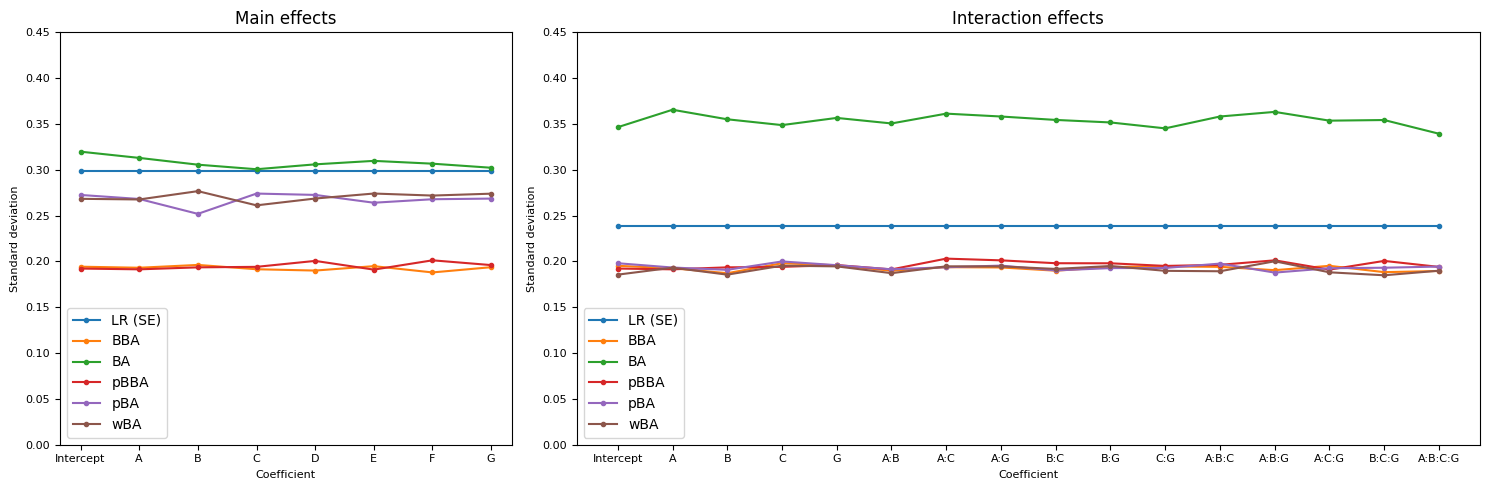

In [17]:
results.update({
    'BA_main': common.bootstrapAnalysis(data, formula_main, nrepeats=1000),
    'BA_interaction': common.bootstrapAnalysis(data, formula_interaction, nrepeats=1000),
    'BBA_main': common.befittingBootstrapAnalysis(data, formula_main, group, nrepeats=1000),
    'BBA_interaction': common.befittingBootstrapAnalysis(data, formula_interaction, group, nrepeats=1000),
    'pBA_main': common.parametricBootstrapAnalysis(data, formula_main, nrepeats=1000),
    'pBA_interaction': common.parametricBootstrapAnalysis(data, formula_interaction, nrepeats=1000),
    'pBBA_main': common.parametricBefittingBootstrapAnalysis(data, formula_main, group, nrepeats=1000),
    'pBBA_interaction': common.parametricBefittingBootstrapAnalysis(data, formula_interaction, group, nrepeats=1000),
    'wBA_main': common.wildBootstrapAnalysis(data, formula_main, nrepeats=1000),
    'wBA_interaction': common.wildBootstrapAnalysis(data, formula_interaction, nrepeats=1000),
})

yrange = (0, 0.45)
fig, axes = plt.subplots(ncols=2, figsize=(15, 5), width_ratios=[1, 2])
ax = common.plot_std_coefficients(results['ols_main'], results['BBA_main'], results['BA_main'], 
                                  results['pBBA_main'], results['pBA_main'], results['wBA_main'], ax=axes[0])
ax.set_ylim(yrange)
ax.set_title('Main effects')
ax = common.plot_std_coefficients(results['ols_interaction'], results['BBA_interaction'], results['BA_interaction'], 
                                  results['pBBA_interaction'], results['pBA_interaction'], results['wBA_interaction'], 
                                  ax=axes[1])
ax.set_ylim(yrange)
ax.set_title('Interaction effects')
ax.legend()
plt.tight_layout()
common.saveFigure('wavesoldering-std-1000.pdf')

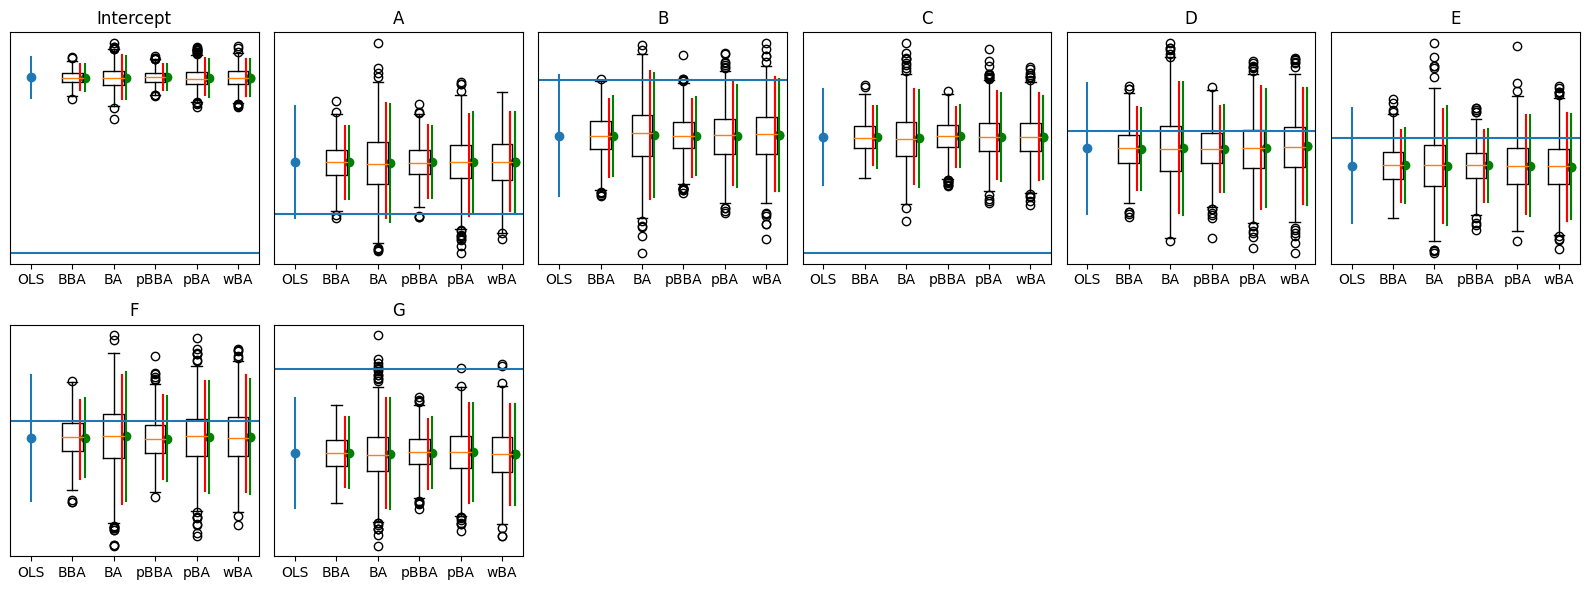

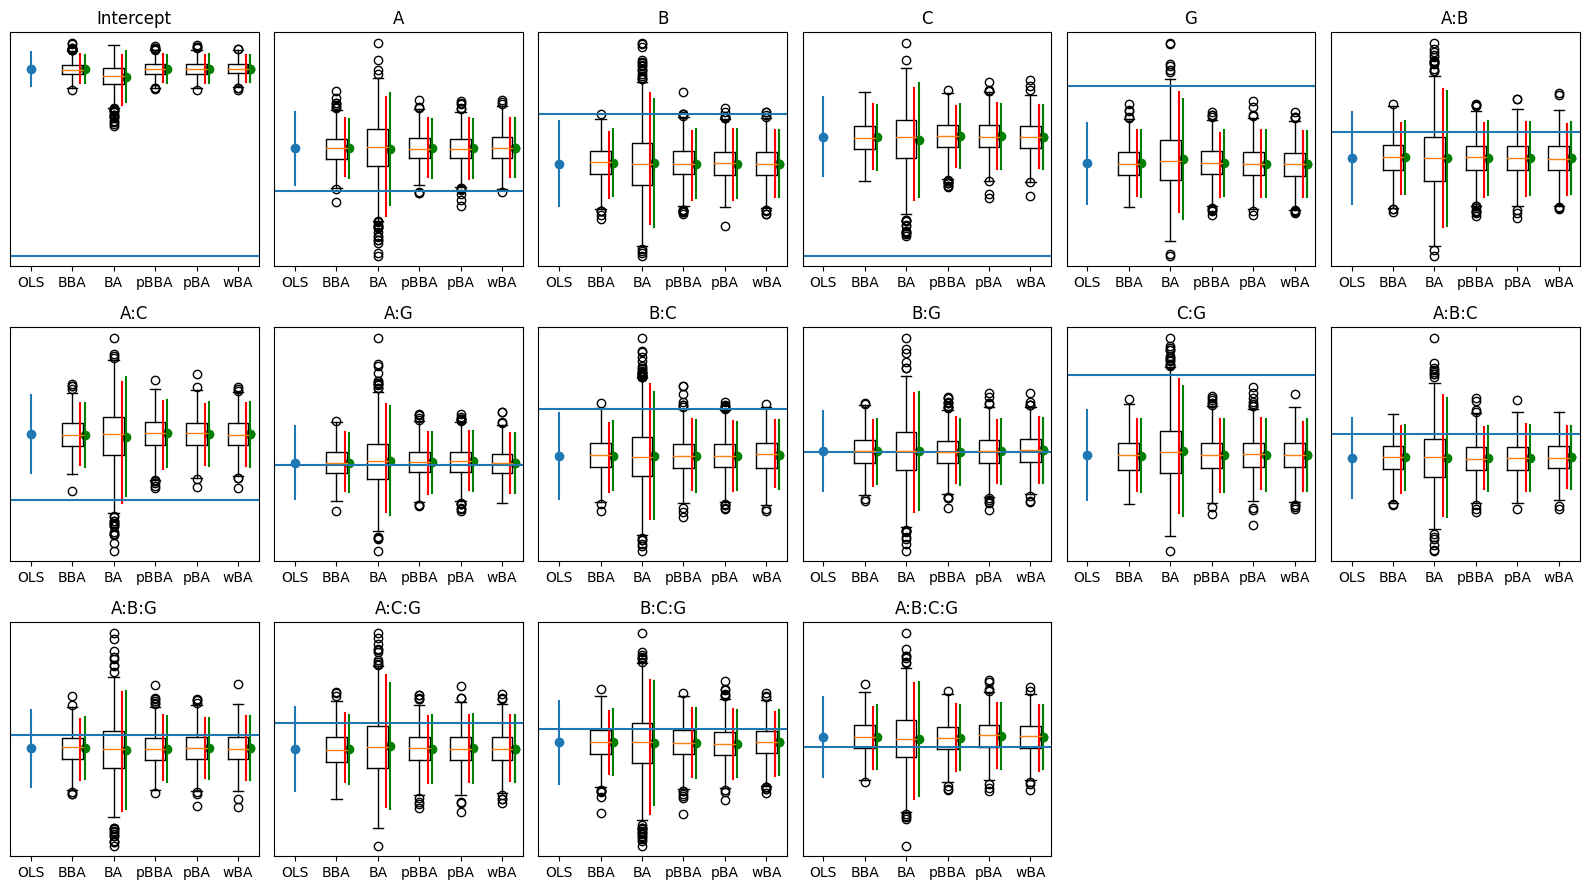

In [18]:
formulas = {'main': formula_main, 'interaction': formula_interaction}

common.plot_coefficients(results['ols_main'], results['BBA_main'], results['BA_main'], 
                         results['pBBA_main'], results['pBA_main'], results['wBA_main'])
plt.tight_layout()
common.saveFigure('wavesoldering-main-dist.pdf')

common.plot_coefficients(results['ols_interaction'], results['BBA_interaction'], results['BA_interaction'], 
                         results['pBBA_interaction'], results['pBA_interaction'], results['wBA_interaction'])
plt.tight_layout()
common.saveFigure('wavesoldering-int-dist.pdf')

In [19]:
for method in ('BBA', 'BA', 'pBBA', 'pBA', 'wBA'):
    sign_main = results['ols_main'].pvalues < 0.1
    sign_int = results['ols_interaction'].pvalues < 0.1
    comparison = pd.concat({
        'Main': common.calculate_Delta(results['ols_main'], results[f'{method}_main']),
        'Interaction': common.calculate_Delta(results['ols_interaction'], results[f'{method}_interaction']),
        }, axis=1)
    # }, axis=0)
    styler = comparison.style
    formats = {}
    for formula in ('Main', 'Interaction', 'Full'):
            formats.update({
                (formula, 'Regr.'): '{:.3f}',
                (formula, 'Bootstrap'): '{:.3f}',
                (formula, 'Delta'): '{:.1f}',
            })
    styler.format(formats, na_rep='')
    def style_specific_cell(x):
        color = 'red:--rwrap;'
        df1 = pd.DataFrame('', index=x.index, columns=x.columns)
        for term, pval in zip(results['ols_interaction'].params.index, results['ols_interaction'].pvalues):
            if pval > 0.1:
                continue
            df1.loc[term, ('Interaction', 'Regr.')] = color
            df1.loc[term, ('Interaction', 'Bootstrap')] = color
            df1.loc[term, ('Interaction', 'Delta')] = color
        for term, pval in zip(results['ols_main'].params.index, results['ols_main'].pvalues):
            if pval > 0.1:
                continue
            df1.loc[term, ('Main', 'Regr.')] = color
            df1.loc[term, ('Main', 'Bootstrap')] = color
            df1.loc[term, ('Main', 'Delta')] = color
        return df1

    styler.apply(style_specific_cell, axis=None)
    styler

    common.saveTable(f'wavesoldering-{method}.tex', styler.to_latex(
        multicol_align="c",
        column_format='l' + 'rrr'*6,
        position_float='centering',
        hrules=True,
        label=f'tbl:wavesoldering-{method}',
        caption=f'{method} std. deviation of the regression coefficients for the wave soldering data.',
    ))
    display(styler)